###Bank marketing Case Study

The data is related to direct marketing campaigns of a Portugese Banking Institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed (yes) or not subscribed (no).
Output variable -> y


-------------------------------------------------------------------------------




y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

Attribute information For bank dataset

Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")



### related with the last contact of the current campaign:


9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

###other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

18 - Missing Attribute Values: None

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [3]:
#Load the data set
bank = pd.read_csv("bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.shape

(45211, 17)

In [8]:
# Find and Replace Encoding for month categorical varaible
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [9]:
print(bank.age.value_counts(),"\n")
print(bank.job.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [10]:
bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [11]:
bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
bank.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [13]:
bank.housing.value_counts()
# no means  = 0
# yes means = 1

yes    25130
no     20081
Name: housing, dtype: int64

In [14]:
bank.loan.value_counts()


no     37967
yes     7244
Name: loan, dtype: int64

In [15]:
bank.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [16]:
bank.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [17]:
bank.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

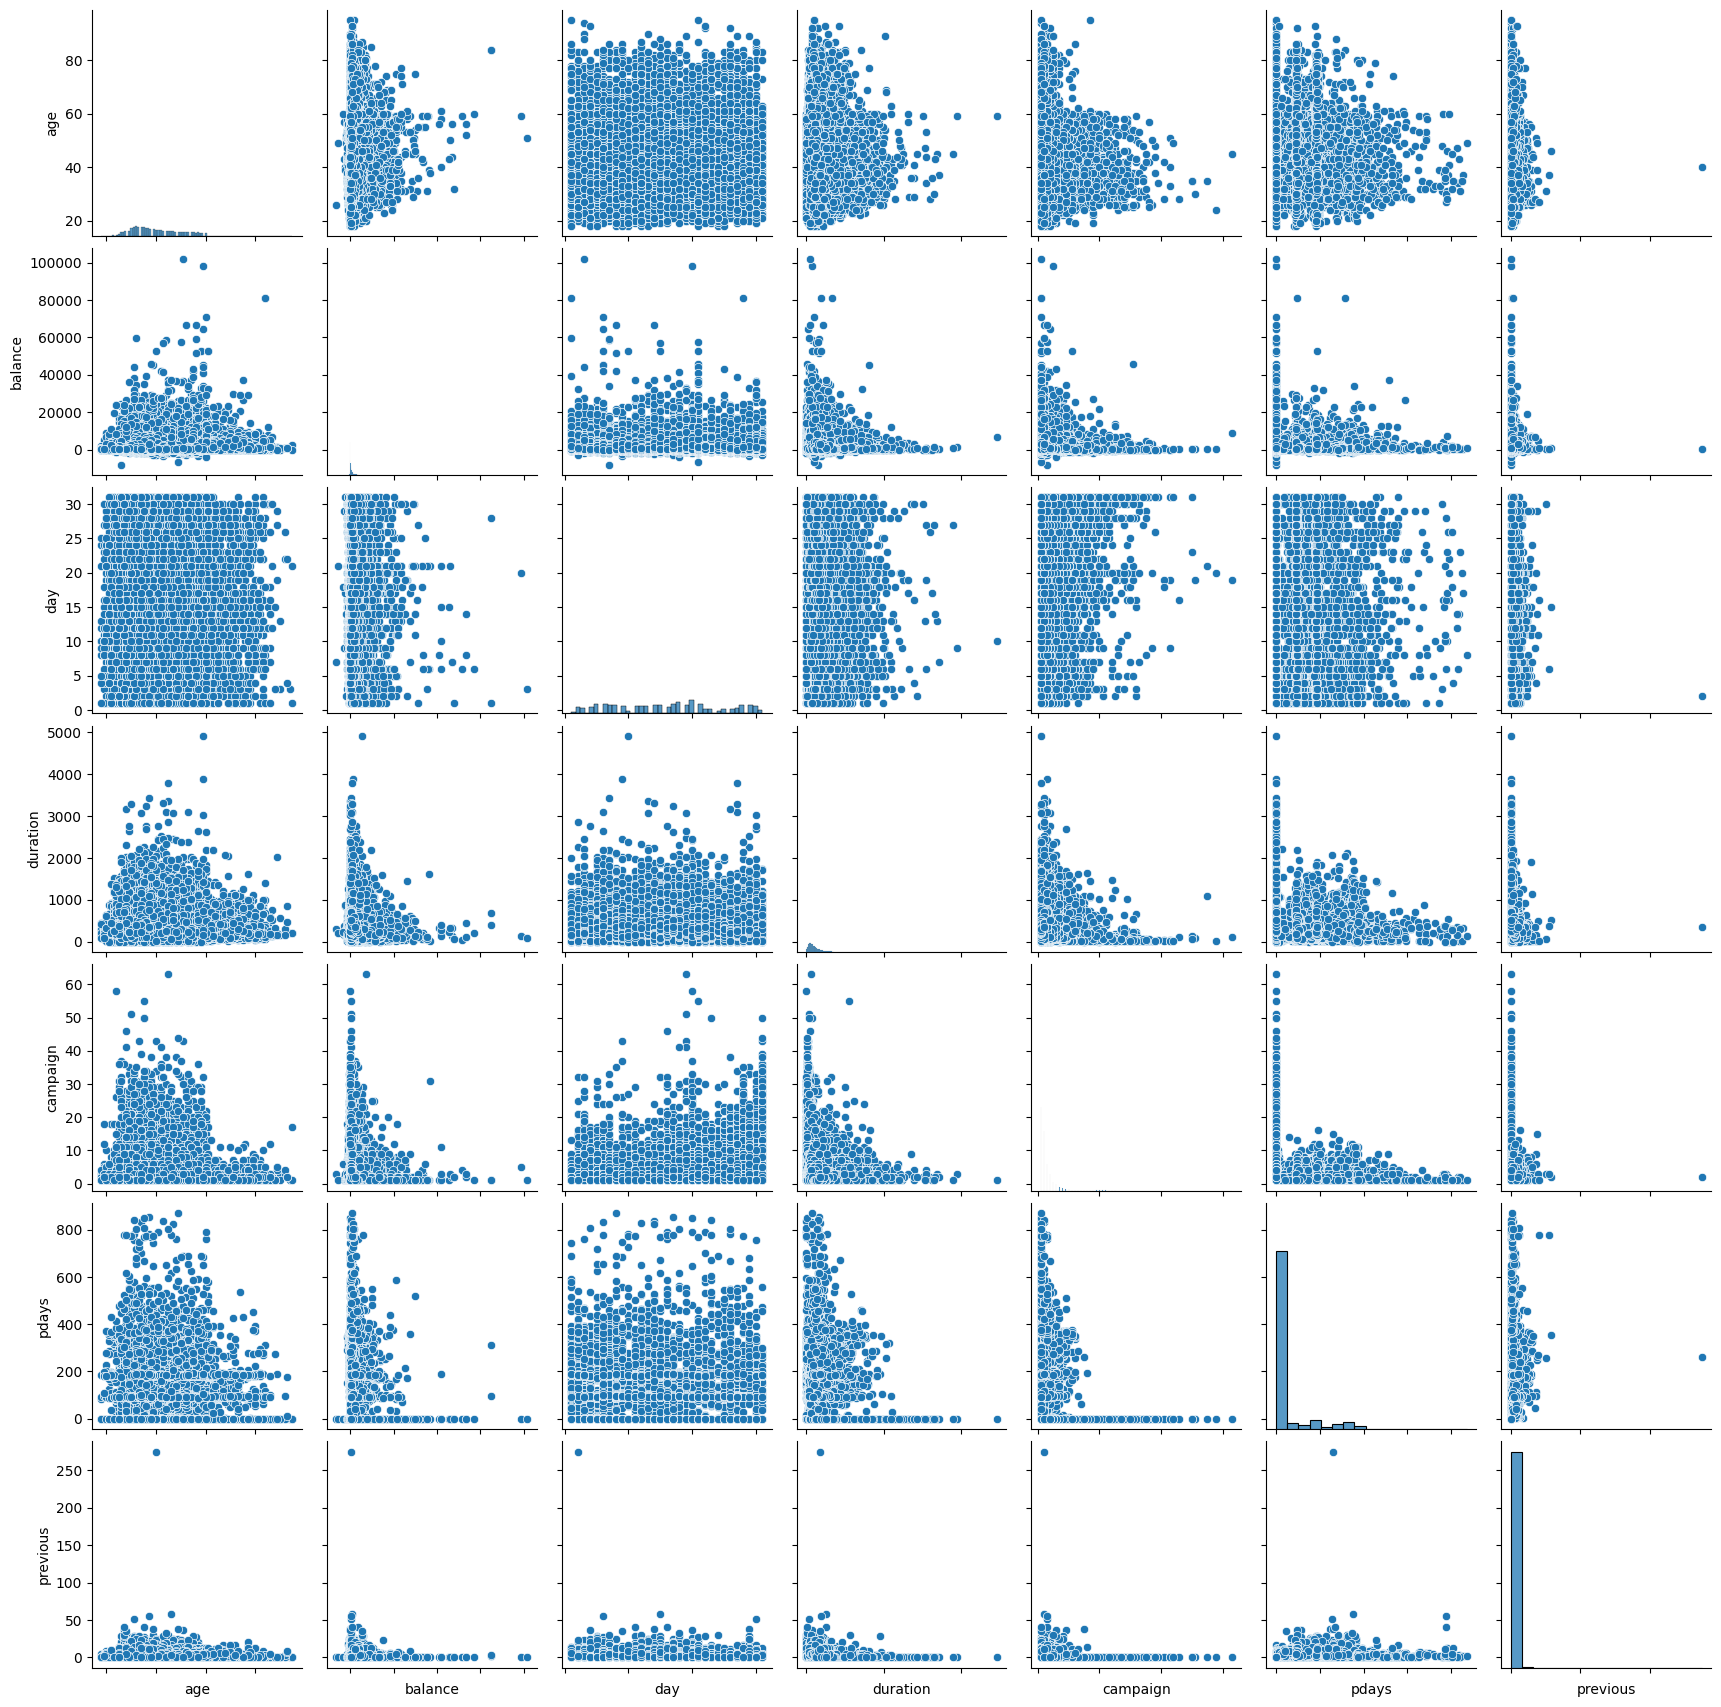

In [18]:
g = sns.pairplot(bank)
g.set(xticklabels=[])
plt.show()

<ipython-input-19-89cf3eccdee0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


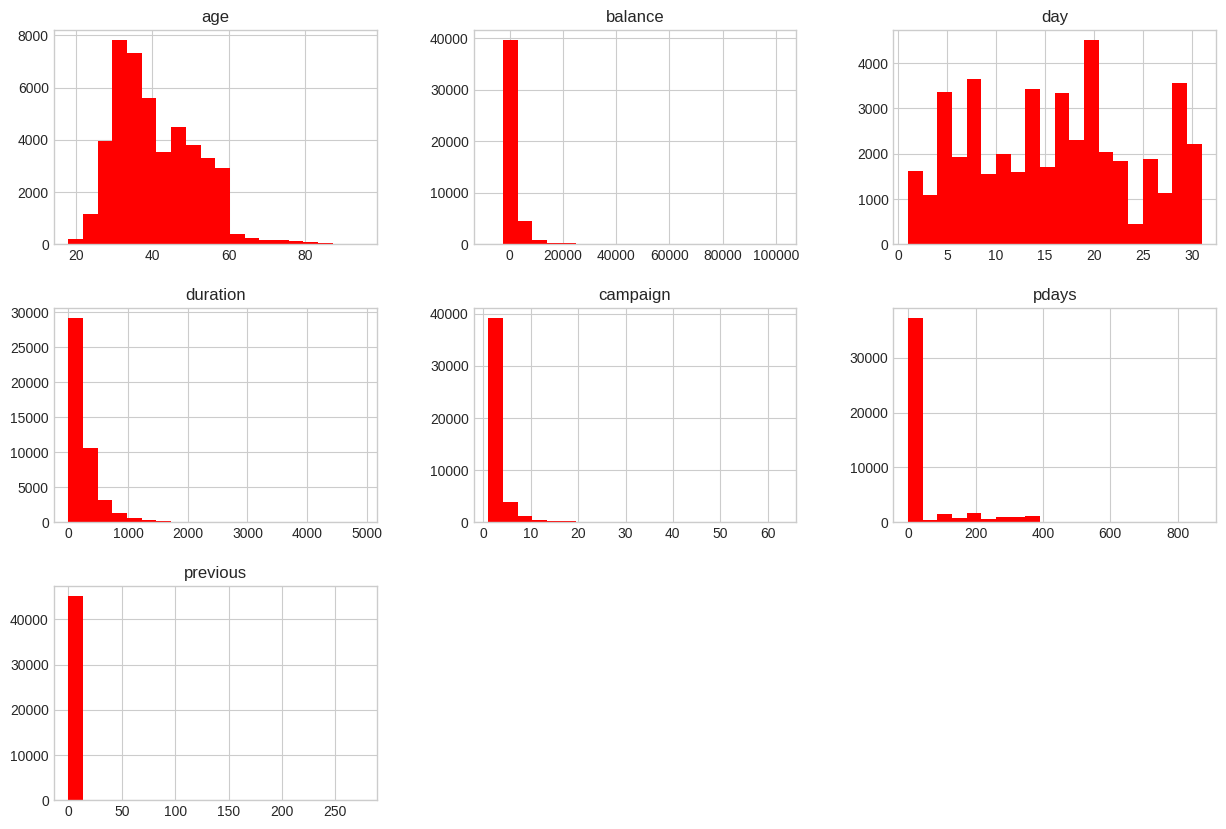

In [19]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()

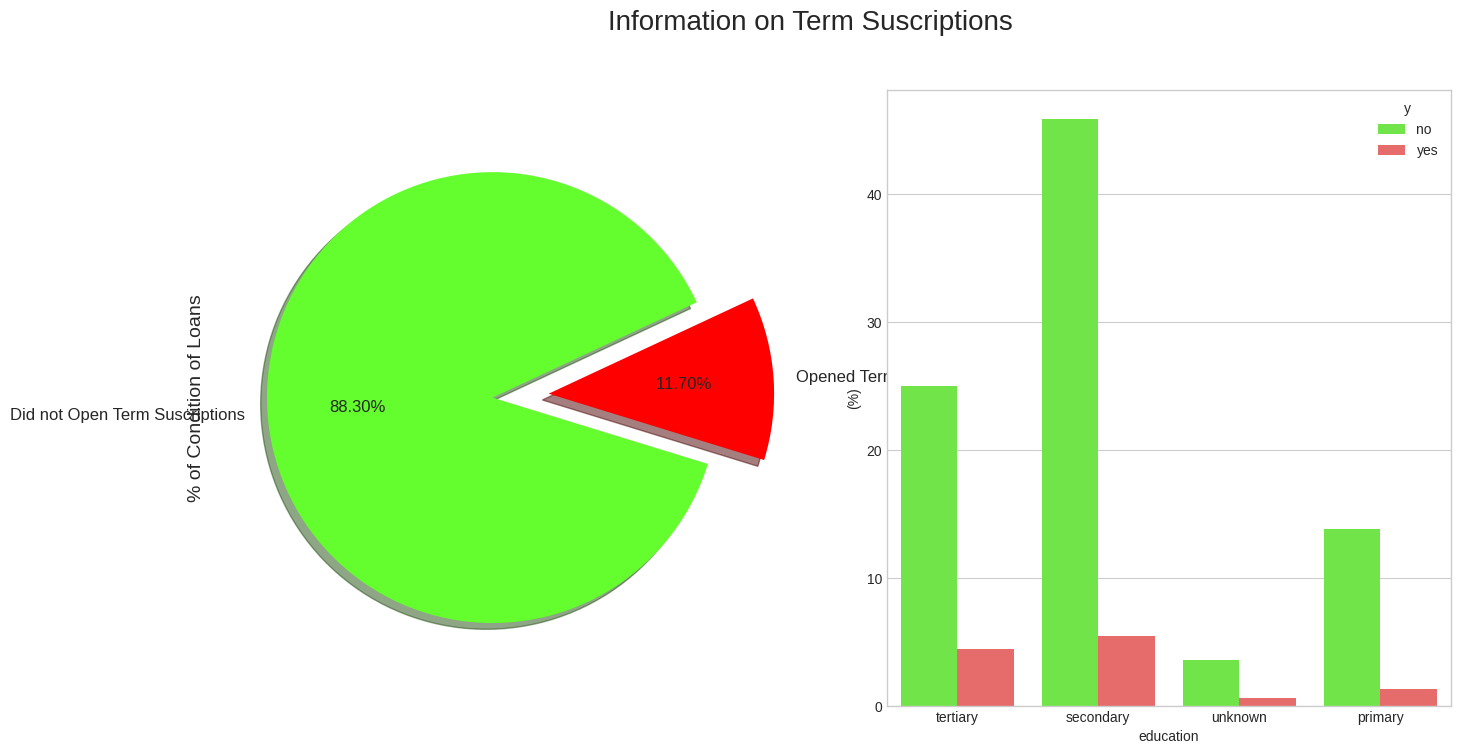

In [20]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#64FE2E", "#FF0000"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=bank, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="y", data=bank, palette=palette, estimator=lambda x: len(x) / len(bank) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

<ipython-input-21-89cf3eccdee0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


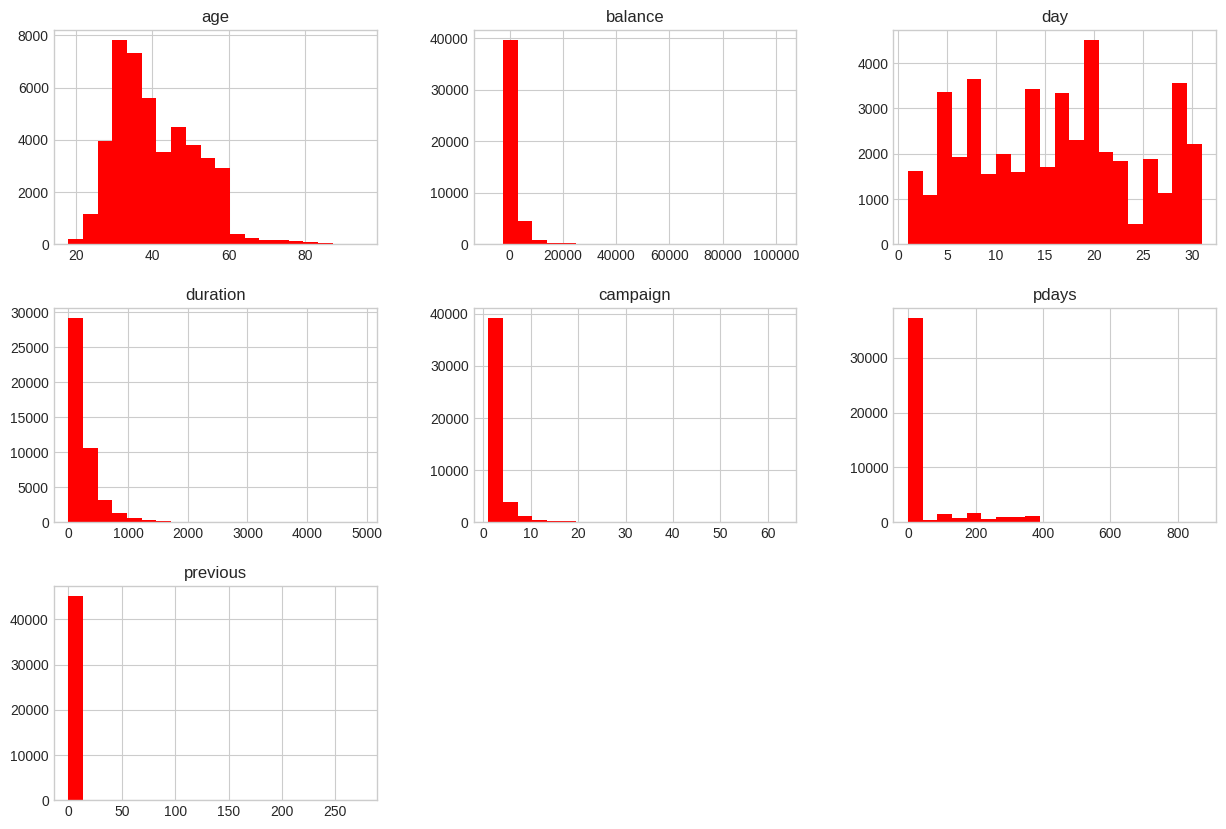

In [21]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()

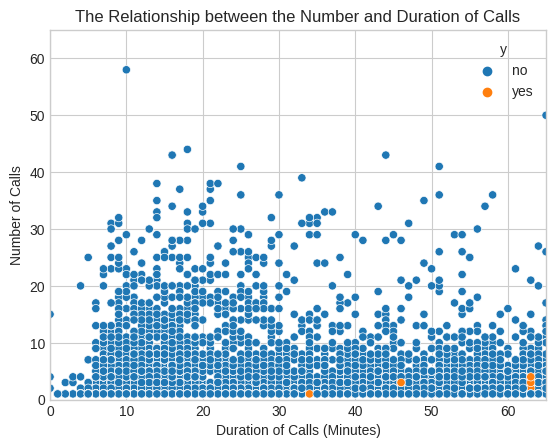

In [22]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
#bank['job']=le.fit_transform(bank['job'])
#bank['marital']=le.fit_transform(bank['marital'])
#bank['education']=le.fit_transform(bank['education'])
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
#bank['month']=le.fit_transform(bank['month'])
bank['default']=le.fit_transform(bank['default'])
bank['y']=le.fit_transform(bank['y'])

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [26]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


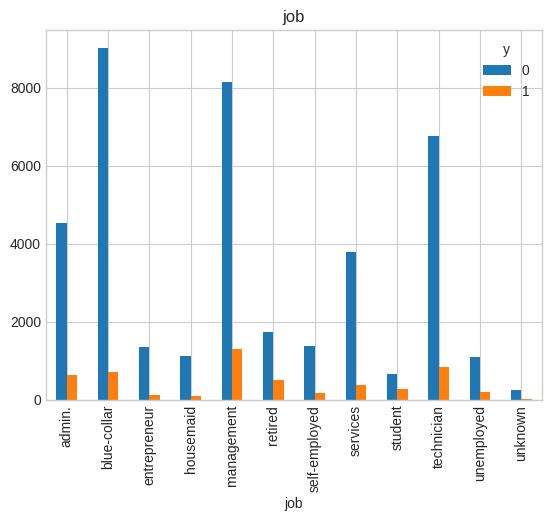

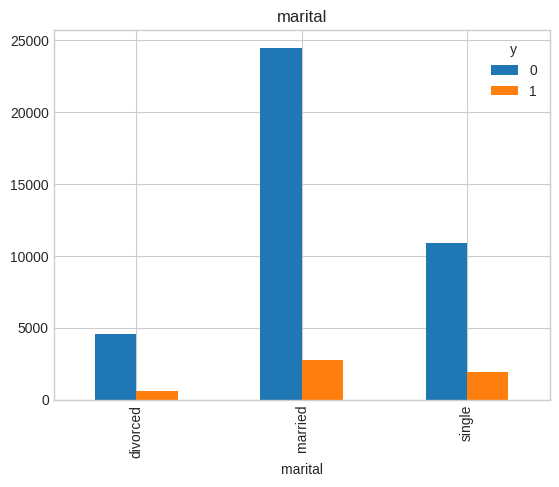

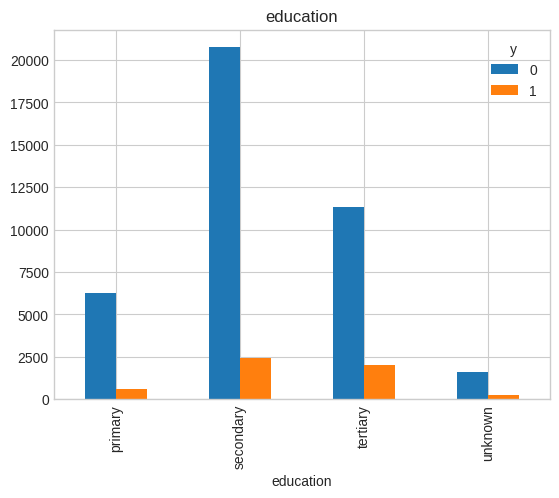

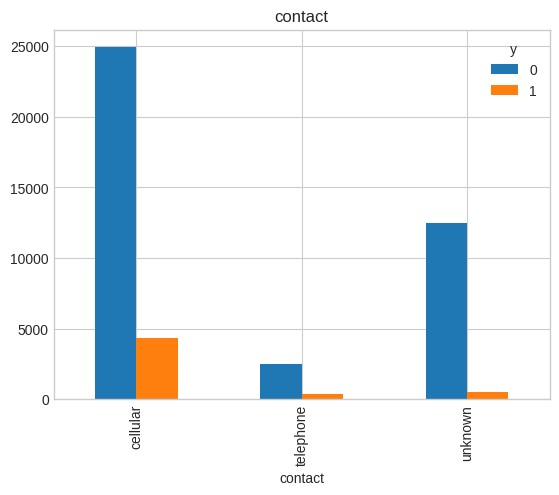

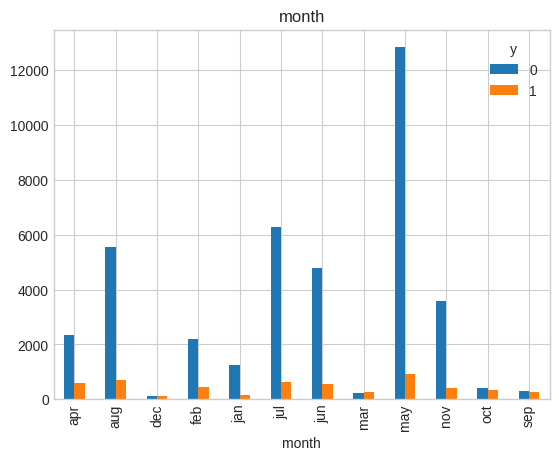

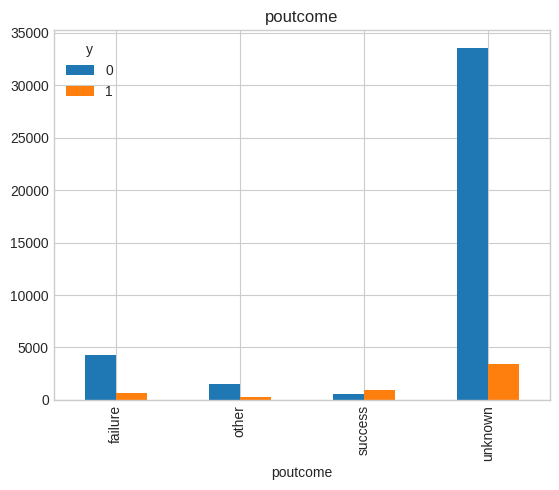

In [27]:
# iterated through df and stored data with datatype as 'object' to new variable cat_col
cat_col = [n for n in bank.columns if bank[n].dtypes == 'object']

#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    pd.crosstab(bank[col], bank.y).plot(kind = 'bar')
    plt.title(col)

In [28]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
# concatination of two dataframes 'bank' and 'dummies'
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [30]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
bank.shape

(45211, 43)

In [32]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

Now we have 43 columns in the dataframe on which we need to perform the analysis and make prediction model

###Checking outliers


Collecting the columns with continuous values in the dataframe and checking outliers for it

In [33]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [34]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


<Axes: ylabel='previous'>

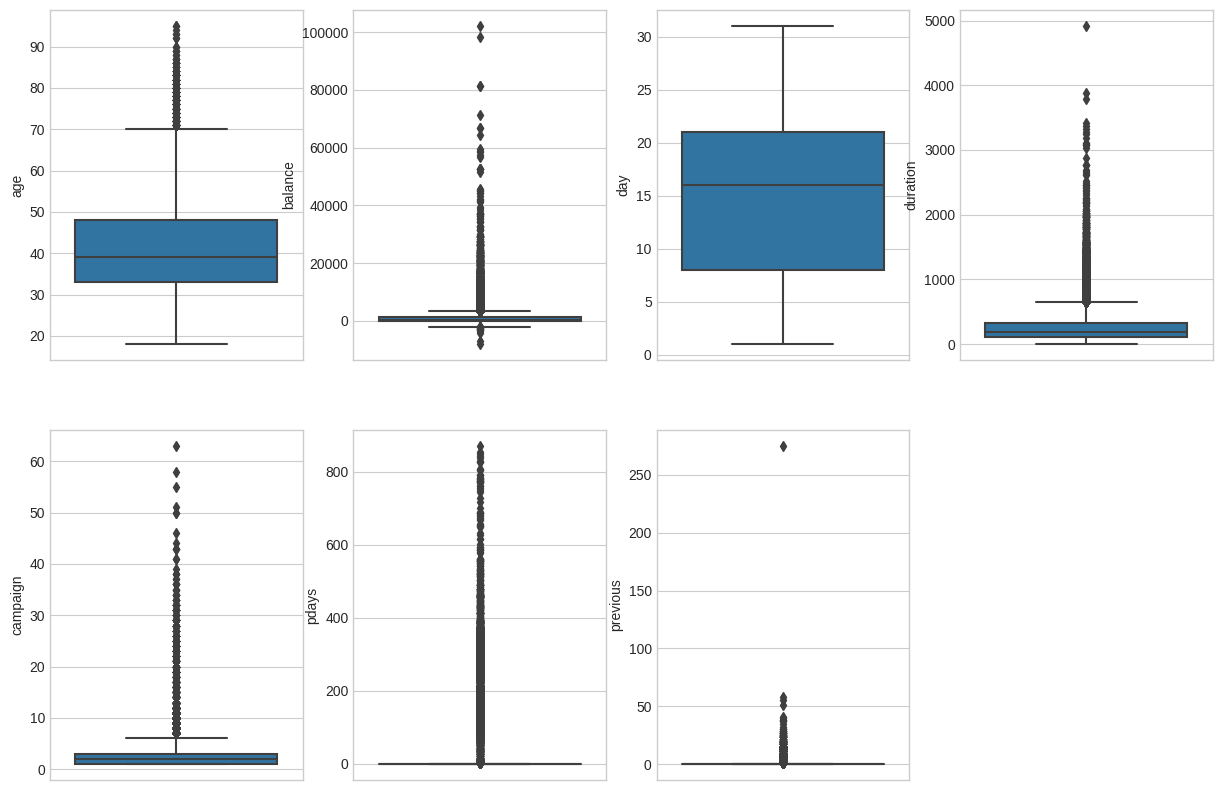

In [35]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making

% no subcription:  88.30151954170445
% subcription:  11.698480458295547


<Axes: >

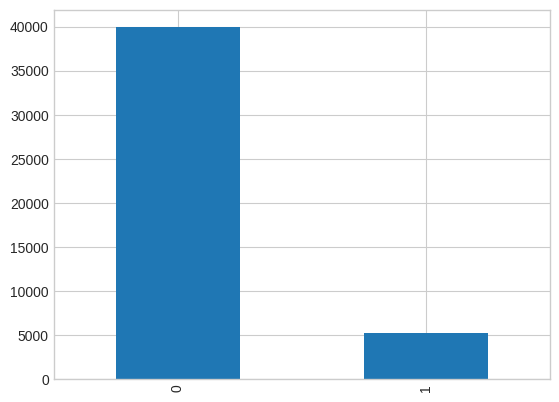

In [36]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
all_row = len(bank)
no_sub = len(bank[bank['y'] == 0])
sub = len(bank[bank['y']==1])
percentage_no_sub = (no_sub/all_row) * 100
percentage_sub = (sub/all_row) * 100

print('% no subcription: ', percentage_no_sub)
print('% subcription: ', percentage_sub)
my_color = 'rg'
bank['y'].value_counts().plot(kind='bar')

from analysis above, we can see majority data is no subcription

88%, dependent variable is no_sub

###Visualization

Text(0, 0.5, 'y')

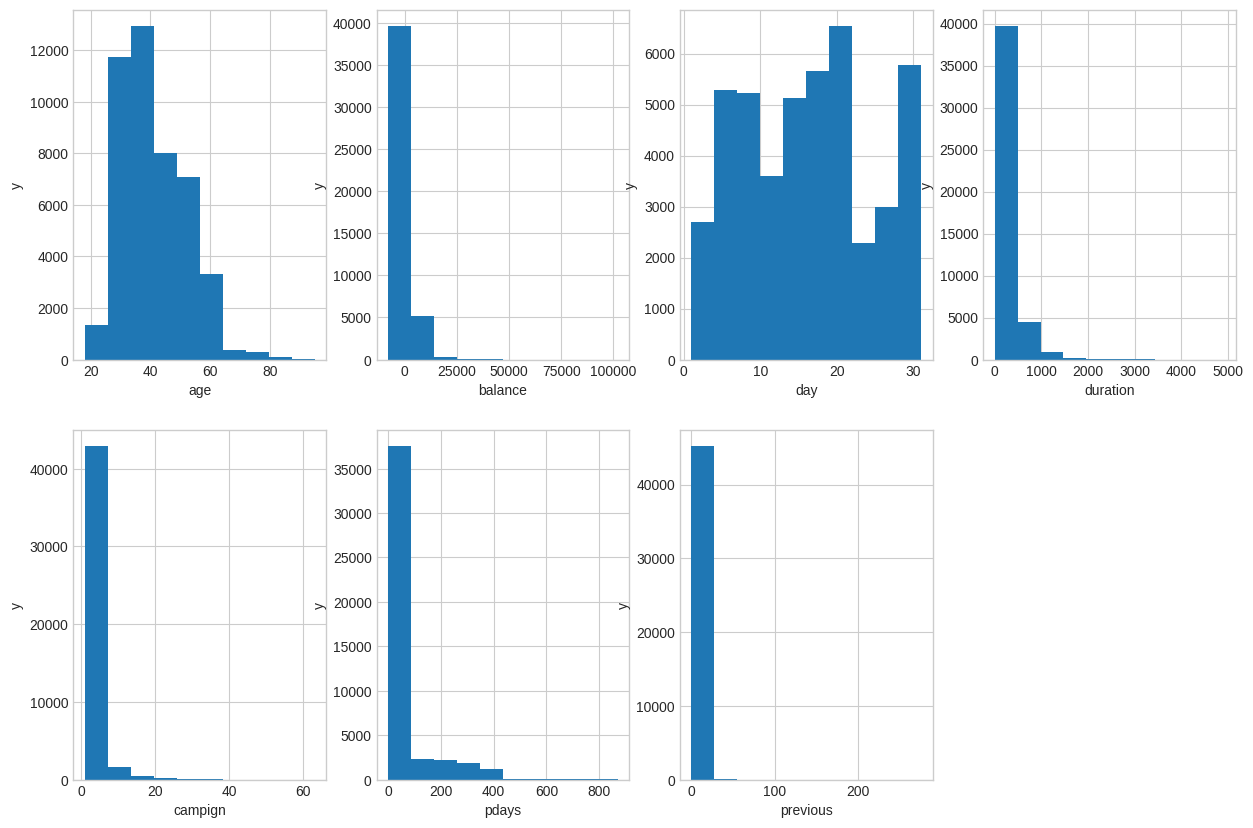

In [37]:
plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = bank.age.hist(bins=10)
fig.set_xlabel('age')
fig.set_ylabel('y')


plt.subplot(2, 4, 2)
fig = bank.balance.hist(bins=10)
fig.set_xlabel('balance')
fig.set_ylabel('y')


plt.subplot(2, 4, 3)
fig = bank.day.hist(bins=10)
fig.set_xlabel('day')
fig.set_ylabel('y')


plt.subplot(2, 4, 4)
fig = bank.duration.hist(bins=10)
fig.set_xlabel('duration')
fig.set_ylabel('y')

plt.subplot(2, 4, 5)
fig = bank.campaign.hist(bins=10)
fig.set_xlabel('campign')
fig.set_ylabel('y')

plt.subplot(2, 4, 6)
fig = bank.pdays.hist(bins=10)
fig.set_xlabel('pdays')
fig.set_ylabel('y')

plt.subplot(2, 4, 7)
fig = bank.previous.hist(bins=10)
fig.set_xlabel('previous')
fig.set_ylabel('y')

<Axes: >

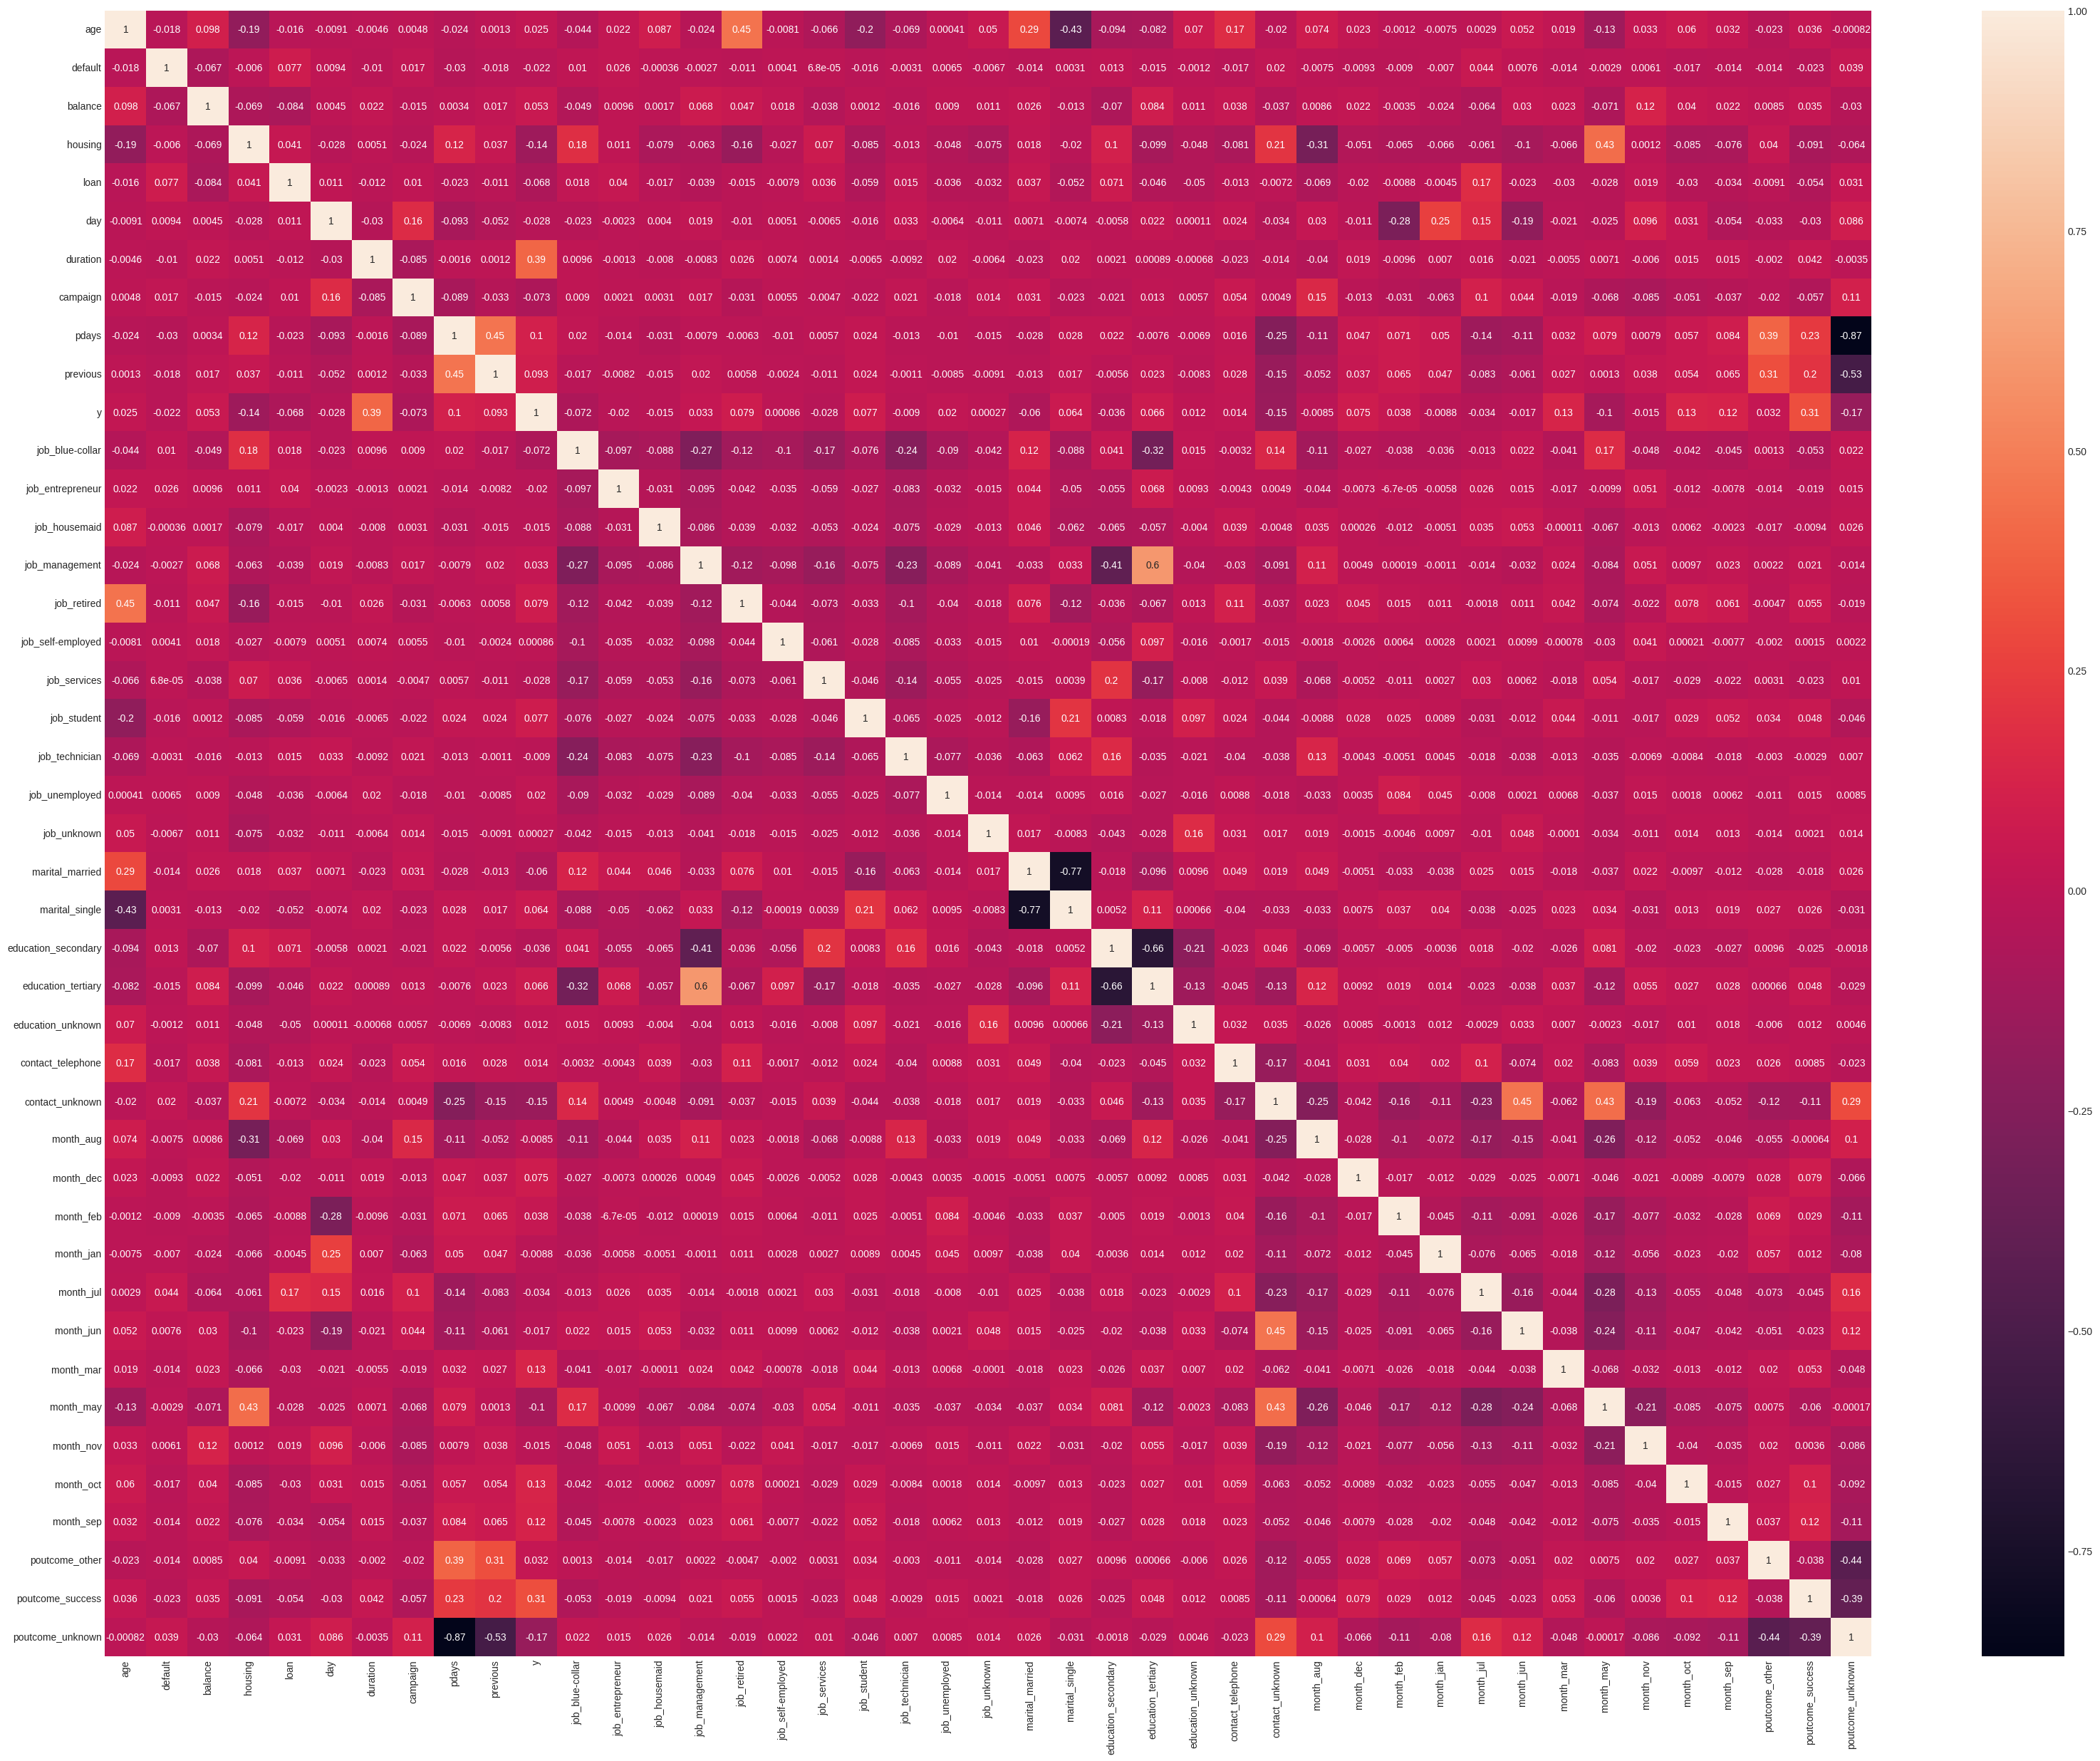

In [38]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

We are not gonna drop any column because none of the column is very highly correlated with the target column

In [39]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.7

This shows that approximately 12% people are subscribed to the bank term deposit


####Splitting the target variable and the predictor features in two different dataframes from Train Test Split

In [41]:
# X will have all the features
X = bank.drop(['y'],1)
# Y will have the target variable
Y = bank['y']

<ipython-input-41-25f0ca67d1cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bank.drop(['y'],1)


In [42]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

###Train Test Split

In [44]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

#Splitting the data in train and test dataframe in the ratio of 7:3

In [45]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
18391,-0.087715,0,1.103100,0,0,1.824143,-0.093607,-0.251559,-0.412081,-0.237746,...,1,0,0,0,0,0,0,0,0,1
13056,-1.404878,0,-0.555004,0,1,-0.938821,-0.360990,-0.573232,-0.412081,-0.237746,...,1,0,0,0,0,0,0,0,0,1
13415,1.041282,0,0.655212,1,0,-0.818692,-0.248612,-0.573232,-0.412081,-0.237746,...,1,0,0,0,0,0,0,0,0,1
21022,-0.181798,0,-0.223447,0,0,-0.218048,0.150526,-0.251559,-0.412081,-0.237746,...,0,0,0,0,0,0,0,0,0,1
24510,0.853116,0,-0.172097,0,0,0.142339,-0.725251,-0.573232,0.977123,0.579851,...,0,0,0,0,1,0,0,0,0,0


###Model Building

Buiding first logistic regression model

In [46]:
# logistic regression model

import statsmodels.api as sm
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31604
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7495.1
Date:                Tue, 29 Aug 2023   Deviance:                       14990.
Time:                        09:48:14   Pearson chi2:                 3.17e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2205
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5776      0.164     -9.648      0.000      -1.898      -1.257
age                     0.0260      0.028      0.925      0.355      -0.029       0.081
default                -0.1470      0.208     -0.705      0.481      -0.556       0.262
balance                 0.0420      0.018      2.330      0.020       0.007       0.077
housing                -0.6830      0.053    -12.990      0.000      -0.786      -0.580
loan                   -0.4301      0.073     -5.913      0.000      -0.573      -0.288
day                     0.0827      0.025      3.332      0.001       0.034       0.131
duration                1.0871      0.020     54.354      0.000       1.048       1.126
campaign               -0.2476      0.036     -6.785      0.000      -0.319      -0.176
pdays                  -0.0542      0.038     -1.444      0.149      -0.128       0.019
previous                0.0161      0.016      1.023      0.306      -0.015       0.047
job_blue-collar        -0.1813      0.087     -2.080      0.037      -0.352      -0.010
job_entrepreneur       -0.3781      0.153     -2.476      0.013      -0.677      -0.079
job_housemaid          -0.4418      0.164     -2.702      0.007      -0.762      -0.121
job_management         -0.1388      0.089     -1.560      0.119      -0.313       0.036
job_retired             0.2457      0.117      2.094      0.036       0.016       0.476
job_self-employed      -0.3501      0.137     -2.553      0.011      -0.619      -0.081
job_services           -0.1662      0.101     -1.641      0.101      -0.365       0.032
job_student             0.4831      0.133      3.629      0.000       0.222       0.744
job_technician         -0.1814      0.084     -2.170      0.030      -0.345      -0.018
job_unemployed         -0.0547      0.134     -0.408      0.683      -0.317       0.208
job_unknown             0.0241      0.257      0.094      0.925      -0.479       0.527
marital_married        -0.1333      0.071     -1.866      0.062      -0.273       0.007
marital_single          0.1675      0.081      2.057      0.040       0.008       0.327
education_secondary     0.2867      0.078      3.665      0.000       0.133       0.440
education_tertiary      0.4671      0.091      5.110      0.000       0.288       0.646
education_unknown       0.2782      0.125      2.217      0.027       0.032       0.524
contact_telephone      -0.1836      0.089     -2.054      0.040      -0.359      -0.008
contact_unknown        -1.6908      0.089    -19.046      0.000      -1.865      -1.517
month_aug              -0.6770      0.094     -7.214      0.000      -0.861      -0.493
month_dec               0.7339      0.210      3.492      0.000       0.322       1.146
month_feb              -0.1288      0.107     -1.208      0.227      -0.338       0.080
mon

###Feature Selection using RFE

In [47]:
logreg = LogisticRegression()

In [64]:
# Running RFE with 13 variables as output

#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
rfe1 = RFE(logreg,n_features_to_select=20)
rfe1 = rfe1.fit(x_train,y_train)

In [65]:
list(zip(x_train.columns,rfe1.support_,rfe1.ranking_))

[('age', False, 21),
 ('default', False, 9),
 ('balance', False, 20),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 17),
 ('duration', True, 1),
 ('campaign', False, 5),
 ('pdays', False, 18),
 ('previous', False, 23),
 ('job_blue-collar', False, 13),
 ('job_entrepreneur', False, 3),
 ('job_housemaid', False, 2),
 ('job_management', False, 16),
 ('job_retired', True, 1),
 ('job_self-employed', False, 8),
 ('job_services', False, 14),
 ('job_student', True, 1),
 ('job_technician', False, 15),
 ('job_unemployed', False, 19),
 ('job_unknown', False, 22),
 ('marital_married', False, 6),
 ('marital_single', False, 11),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', True, 1),
 ('contact_telephone', False, 10),
 ('contact_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_feb', False, 7),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 

In [66]:
col1 = x_train.columns[rfe1.support_]
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'job_student',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success'],
      dtype='object')

In [51]:
x_train.columns[~rfe1.support_]

Index(['age', 'default', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'month_feb', 'poutcome_other', 'poutcome_unknown'],
      dtype='object')

###Assessing the model with StatsModels

In [52]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7567.6
Date:                Tue, 29 Aug 2023   Deviance:                       15135.
Time:                        09:48:18   Pearson chi2:                 3.44e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2169
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0106      0.085    -23.572      0.000      -2.178      -1.843
housing                -0.6871      0.050    -13.606      0.000      -0.786      -0.588
loan                   -0.4629      0.072     -6.413      0.000      -0.604      -0.321
duration                1.0844      0.020     54.779      0.000       1.046       1.123
job_retired             0.4126      0.083      4.960      0.000       0.250       0.576
job_student             0.7642      0.114      6.729      0.000       0.542       0.987
education_secondary     0.3750      0.073      5.148      0.000       0.232       0.518
education_tertiary      0.5722      0.076      7.504      0.000       0.423       0.722
education_unknown       0.3551      0.121      2.925      0.003       0.117       0.593
contact_unknown        -1.7406      0.085    -20.359      0.000      -1.908      -1.573
month_aug              -0.7703      0.076    -10.102      0.000      -0.920      -0.621
month_dec               0.7669      0.203      3.769      0.000       0.368       1.166
month_jan              -1.1769      0.140     -8.386      0.000      -1.452      -0.902
month_jul              -0.8858      0.078    -11.314      0.000      -1.039      -0.732
month_jun               0.4955      0.097      5.082      0.000       0.304       0.687
month_mar               1.5668      0.139     11.292      0.000       1.295       1.839
month_may              -0.3469      0.074     -4.675      0.000      -0.492      -0.201
month_nov              -0.7428      0.088     -8.406      0.000      -0.916      -0.570
month_oct               1.1103      0.120      9.283      0.000       0.876       1.345
month_sep               0.9653      0.132      7.314      0.000       0.707       1.224
poutcome_success        2.4348      0.078     31.315      0.000       2.282       2.587
=======================================================================================
"""

In [53]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.067678
13056    0.033061
13415    0.036231
21022    0.114508
24510    0.048902
14062    0.008990
16250    0.033488
16330    0.026527
35883    0.062011
12306    0.030125
dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06767835, 0.0330609 , 0.0362306 , 0.11450802, 0.0489018 ,
       0.0089897 , 0.03348761, 0.02652694, 0.06201109, 0.03012507])


###Creating the dataframe with the actual subscription flag and the predicted probabilities

In [55]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.067678,18391
1,0,0.033061,13056
2,0,0.036231,13415
3,0,0.114508,21022
4,0,0.048902,24510
5,0,0.008990,14062
6,0,0.033488,16250
7,0,0.026527,16330
8,0,0.062011,35883
9,0,0.030125,12306


###Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [56]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.067678,18391,0
1,0,0.033061,13056,0
2,0,0.036231,13415,0
3,0,0.114508,21022,0
4,0,0.048902,24510,0
5,0,0.008990,14062,0
6,0,0.033488,16250,0
7,0,0.026527,16330,0
8,0,0.062011,35883,0
9,0,0.030125,12306,0


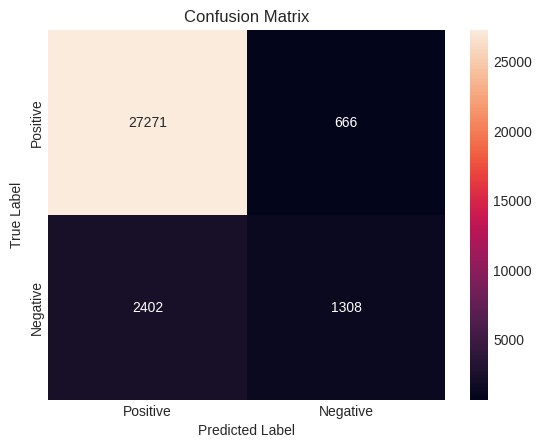

In [57]:
# creating confusion matrix for the following prediction

import sklearn.metrics as metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion
class_label = ["Positive", "Negative"]
cm = pd.DataFrame(confusion, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix
Actual/Predicted	Non Sub	Sub
Non Sub	2726	59
Sub	260	119

In [58]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))


0.9030555818876986


The accuracy of the model is approximately 90% which is a really good model for prediction but we need to check the VIFs as well

###Checking VIFs for the selected 20 variables

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
15,month_may,3.60
5,education_secondary,3.00
8,contact_unknown,2.92
0,housing,2.71
13,month_jun,2.24
6,education_tertiary,2.15
12,month_jul,1.61
9,month_aug,1.54
16,month_nov,1.37
1,loan,1.23


There are no feature in the above VIF table whose value is greater than 5. So, there is no need to drop any of these features for proceeding to the prediction.
But we need to check the p-values as well from the StatsModel to proceed further.

In [60]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7567.6
Date:                Tue, 29 Aug 2023   Deviance:                       15135.
Time:                        09:48:20   Pearson chi2:                 3.44e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2169
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0106      0.085    -23.572      0.000      -2.178      -1.843
housing                -0.6871      0.050    -13.606      0.000      -0.786      -0.588
loan                   -0.4629      0.072     -6.413      0.000      -0.604      -0.321
duration                1.0844      0.020     54.779      0.000       1.046       1.123
job_retired             0.4126      0.083      4.960      0.000       0.250       0.576
job_student             0.7642      0.114      6.729      0.000       0.542       0.987
education_secondary     0.3750      0.073      5.148      0.000       0.232       0.518
education_tertiary      0.5722      0.076      7.504      0.000       0.423       0.722
education_unknown       0.3551      0.121      2.925      0.003       0.117       0.593
contact_unknown        -1.7406      0.085    -20.359      0.000      -1.908      -1.573
month_aug              -0.7703      0.076    -10.102      0.000      -0.920      -0.621
month_dec               0.7669      0.203      3.769      0.000       0.368       1.166
month_jan              -1.1769      0.140     -8.386      0.000      -1.452      -0.902
month_jul              -0.8858      0.078    -11.314      0.000      -1.039      -0.732
month_jun               0.4955      0.097      5.082      0.000       0.304       0.687
month_mar               1.5668      0.139     11.292      0.000       1.295       1.839
month_may              -0.3469      0.074     -4.675      0.000      -0.492      -0.201
month_nov              -0.7428      0.088     -8.406      0.000      -0.916      -0.570
month_oct               1.1103      0.120      9.283      0.000       0.876       1.345
month_sep               0.9653      0.132      7.314      0.000       0.707       1.224
poutcome_success        2.4348      0.078     31.315      0.000       2.282       2.587
=======================================================================================
"""

We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [61]:
# dropping column 'month_sep'
col1 = col1.drop('month_sep',1)
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'job_student',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_success'],
      dtype='object')

In [62]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31627
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7593.6
Date:                Tue, 29 Aug 2023   Deviance:                       15187.
Time:                        09:48:20   Pearson chi2:                 3.37e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2156
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8805      0.083    -22.789      0.000      -2.042      -1.719
housing                -0.7159      0.050    -14.257      0.000      -0.814      -0.617
loan                   -0.4718      0.072     -6.548      0.000      -0.613      -0.331
duration                1.0833      0.020     54.767      0.000       1.045       1.122
job_retired             0.4471      0.083      5.410      0.000       0.285       0.609
job_student             0.7976      0.113      7.061      0.000       0.576       1.019
education_secondary     0.3698      0.073      5.090      0.000       0.227       0.512
education_tertiary      0.5764      0.076      7.583      0.000       0.427       0.725
education_unknown       0.3674      0.121      3.037      0.002       0.130       0.604
contact_unknown        -1.7237      0.086    -20.133      0.000      -1.892      -1.556
month_aug              -0.9048      0.073    -12.333      0.000      -1.049      -0.761
month_dec               0.6230      0.203      3.071      0.002       0.225       1.021
month_jan              -1.3113      0.139     -9.427      0.000      -1.584      -1.039
month_jul              -1.0067      0.076    -13.259      0.000      -1.156      -0.858
month_jun               0.3584      0.095      3.761      0.000       0.172       0.545
month_mar               1.4313      0.137     10.417      0.000       1.162       1.701
month_may              -0.4624      0.072     -6.433      0.000      -0.603      -0.321
month_nov              -0.8673      0.086    -10.056      0.000      -1.036      -0.698
month_oct               0.9724      0.118      8.244      0.000       0.741       1.204
poutcome_success        2.4830      0.077     32.143      0.000       2.332       2.634
=======================================================================================
"""

In [67]:
# dropping column default
col1 = col1.drop('duration',1)
col1

Index(['housing', 'loan', 'job_retired', 'job_student', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_unknown',
       'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_success'],
      dtype='object')

In [68]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31627
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9572.3
Date:                Tue, 29 Aug 2023   Deviance:                       19145.
Time:                        11:27:08   Pearson chi2:                 3.31e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1111
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7067      0.075    -22.788      0.000      -1.853      -1.560
housing                -0.5351      0.044    -12.086      0.000      -0.622      -0.448
loan                   -0.4553      0.064     -7.141      0.000      -0.580      -0.330
job_retired             0.4537      0.074      6.137      0.000       0.309       0.599
job_student             0.5644      0.104      5.436      0.000       0.361       0.768
education_secondary     0.3097      0.064      4.854      0.000       0.185       0.435
education_tertiary      0.4695      0.067      7.026      0.000       0.339       0.600
education_unknown       0.2869      0.108      2.652      0.008       0.075       0.499
contact_unknown        -1.4146      0.074    -19.098      0.000      -1.560      -1.269
month_aug              -0.7792      0.068    -11.454      0.000      -0.913      -0.646
month_dec               0.8643      0.185      4.684      0.000       0.503       1.226
month_jan              -0.8956      0.122     -7.368      0.000      -1.134      -0.657
month_jul              -0.6328      0.068     -9.248      0.000      -0.767      -0.499
month_jun               0.3711      0.087      4.259      0.000       0.200       0.542
month_mar               1.2001      0.129      9.289      0.000       0.947       1.453
month_may              -0.3108      0.066     -4.716      0.000      -0.440      -0.182
month_nov              -0.6325      0.078     -8.088      0.000      -0.786      -0.479
month_oct               0.9633      0.108      8.911      0.000       0.751       1.175
month_sep               0.8719      0.120      7.264      0.000       0.637       1.107
poutcome_success        2.2380      0.072     31.070      0.000       2.097       2.379
=======================================================================================
"""

In [70]:
# dropping column job_retired
col1 = col1.drop('job_retired',1)
col1

Index(['housing', 'loan', 'job_student', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_unknown',
       'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_success'],
      dtype='object')

In [71]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31628
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9590.2
Date:                Tue, 29 Aug 2023   Deviance:                       19180.
Time:                        11:28:45   Pearson chi2:                 3.31e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1101
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5953      0.072    -22.168      0.000      -1.736      -1.454
housing                -0.5739      0.044    -13.121      0.000      -0.660      -0.488
loan                   -0.4627      0.064     -7.252      0.000      -0.588      -0.338
job_student             0.5129      0.104      4.938      0.000       0.309       0.716
education_secondary     0.2509      0.062      4.018      0.000       0.128       0.373
education_tertiary      0.3902      0.065      6.010      0.000       0.263       0.517
education_unknown       0.2341      0.107      2.181      0.029       0.024       0.445
contact_unknown        -1.4226      0.074    -19.193      0.000      -1.568      -1.277
month_aug              -0.7883      0.068    -11.596      0.000      -0.921      -0.655
month_dec               0.9205      0.185      4.985      0.000       0.559       1.282
month_jan              -0.8933      0.121     -7.387      0.000      -1.130      -0.656
month_jul              -0.6402      0.068     -9.368      0.000      -0.774      -0.506
month_jun               0.3659      0.087      4.197      0.000       0.195       0.537
month_mar               1.2239      0.129      9.498      0.000       0.971       1.477
month_may              -0.3180      0.066     -4.832      0.000      -0.447      -0.189
month_nov              -0.6418      0.078     -8.215      0.000      -0.795      -0.489
month_oct               1.0076      0.108      9.353      0.000       0.796       1.219
month_sep               0.9196      0.120      7.665      0.000       0.684       1.155
poutcome_success        2.2527      0.072     31.283      0.000       2.112       2.394
=======================================================================================
"""

In [ ]:
#Now all the features left have a significant p-value which is good for the model

In [72]:
# predicting the probability once again after dropping the features from data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.120835
13056    0.079643
13415    0.081728
21022    0.119904
24510    0.136234
14062    0.036546
16250    0.120835
16330    0.079643
35883    0.096544
12306    0.048568
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12083484, 0.0796431 , 0.08172765, 0.11990362, 0.13623354,
       0.03654566, 0.12083484, 0.0796431 , 0.09654396, 0.0485681 ])

In [74]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.120835,18391
1,0,0.079643,13056
2,0,0.081728,13415
3,0,0.119904,21022
4,0,0.136234,24510
5,0,0.036546,14062
6,0,0.120835,16250
7,0,0.079643,16330
8,0,0.096544,35883
9,0,0.048568,12306


In [75]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.120835,18391,0
1,0,0.079643,13056,0
2,0,0.081728,13415,0
3,0,0.119904,21022,0
4,0,0.136234,24510,0
5,0,0.036546,14062,0
6,0,0.120835,16250,0
7,0,0.079643,16330,0
8,0,0.096544,35883,0
9,0,0.048568,12306,0


[[27560   377]
 [ 3017   693]]


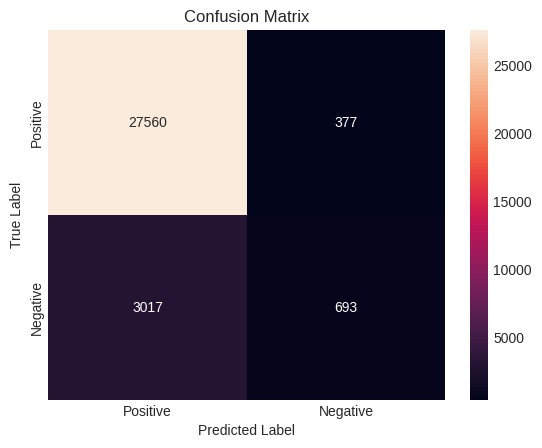

In [77]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

class_label = ["Positive", "Negative"]
cm = pd.DataFrame(confusion, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.892754447498973


In [ ]:
#The accuracy has decreased with a very small margin after dropping the insignificant features from model

In [79]:
#Metrics beyond simply accuracy
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.18679245283018867

In [81]:
# Let us calculate specificity
TN/float(TN+FP)

0.9865053513261982

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.013494648673801768

In [83]:
# positive predictive value
TP/float(TP+FP)

0.6476635514018692

In [84]:
# Negative predictive value
TN/float(TN+FN)

0.9013310658337966

###Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [85]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()

    return None

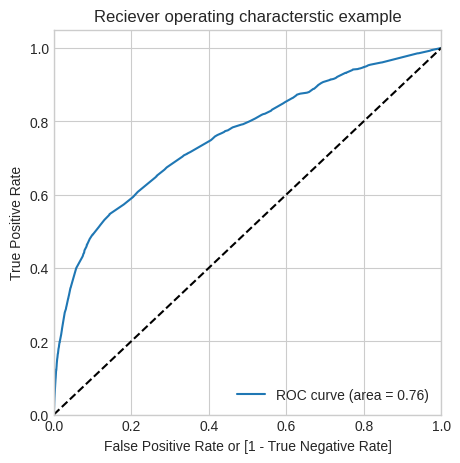

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

###Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [87]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.120835,18391,0,1,1,0,0,0,0,0,0,0,0
1,0,0.079643,13056,0,1,0,0,0,0,0,0,0,0,0
2,0,0.081728,13415,0,1,0,0,0,0,0,0,0,0,0
3,0,0.119904,21022,0,1,1,0,0,0,0,0,0,0,0
4,0,0.136234,24510,0,1,1,0,0,0,0,0,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]

print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.117231  1.000000  0.000000
0.1   0.1  0.662243  0.711860  0.655654
0.2   0.2  0.866844  0.438275  0.923757
0.3   0.3  0.887193  0.316442  0.962988
0.4   0.4  0.891111  0.251752  0.976017
0.5   0.5  0.892754  0.186792  0.986505
0.6   0.6  0.891648  0.120755  0.994022
0.7   0.7  0.889626  0.087601  0.996134
0.8   0.8  0.887256  0.055526  0.997709
0.9   0.9  0.882959  0.004313  0.999642


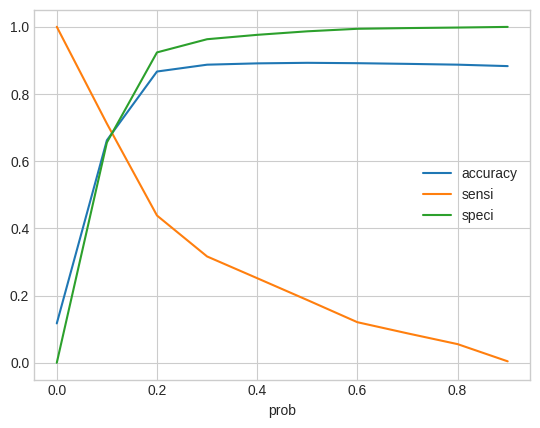

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.15 is the optimum point to take it as a cutoff probability

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.120835,18391,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.079643,13056,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.081728,13415,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.119904,21022,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.136234,24510,0,1,1,0,0,0,0,0,0,0,0,0


In [91]:
metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)

0.8505071570765002

[[25088  2849]
 [ 1882  1828]]


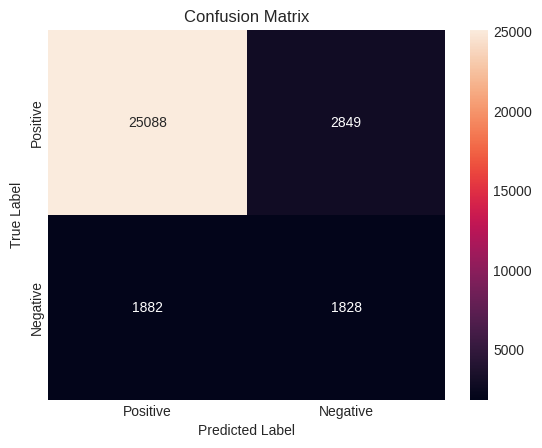

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
print(confusion2)

class_label = ["Positive", "Negative"]
cm = pd.DataFrame(confusion2, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [95]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.492722371967655

In [97]:
# Let us calculate specificity
TN/float(TN+FP)

0.8980205462290153

In [98]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.10197945377098472

In [99]:
# Positive predictive value
TP/float(TP+FP)

0.3908488347231131

In [100]:
# Negative predictive value
TN/float(TN+ FN)

0.9302187615869485


###Precision and Recall

In [102]:

# Looking at the confusion matrix again
confusion

array([[27560,   377],
       [ 3017,   693]])

In [103]:
# Second confusion matrix
confusion2

array([[25088,  2849],
       [ 1882,  1828]])

In [ ]:
#Precision
#TP / TP + FP

In [104]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6476635514018692

In [ ]:
#Recall
#TP / TP + FN

In [105]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.18679245283018867

In [ ]:
#Using sklearn utilities for finding precision and recall

In [107]:
from sklearn.metrics import precision_score
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6476635514018692

In [109]:
from sklearn.metrics import recall_score
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.18679245283018867

Precision and Recall takeoff

In [110]:
y_train_pred_final.Sub, y_train_pred_final.predict

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: Sub, Length: 31647, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: predict, Length: 31647, dtype: int64)

In [112]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

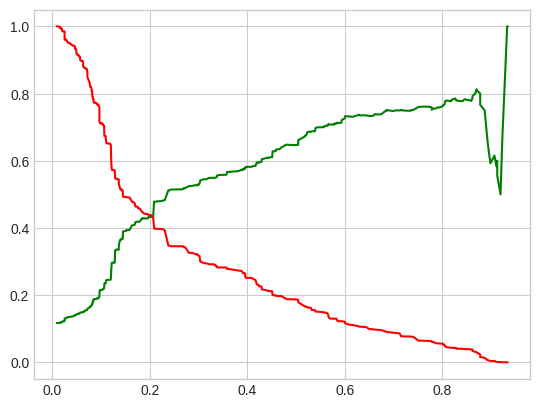

In [113]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###Making predictions on Test data

In [114]:
# transforming the test data
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])
x_test = x_test[col1]
x_test.head()


,housing,loan,job_student,education_secondary,education_tertiary,education_unknown,contact_unknown,month_aug,month_dec,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
14789,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8968,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
34685,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2369,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
36561,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [115]:
x_test_sm = sm.add_constant(x_test)

###Making predictions on the test data

In [116]:
y_test_pred = res.predict(x_test_sm)

In [117]:
y_test_pred[:10]

14789    0.079643
8968     0.094334
34685    0.096544
2369     0.025115
36561    0.441666
22611    0.105963
5137     0.015961
1491     0.025115
34610    0.096544
33988    0.144433
dtype: float64

In [118]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
y_pred_1.head()

,0
14789,0.079643
8968,0.094334
34685,0.096544
2369,0.025115
36561,0.441666


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# Putting Cust_id to index
y_test_df['Cust_id'] = y_test_df.index

In [122]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [124]:
y_pred.head()

,y,Cust_id,0
0,0,14789,0.079643
1,0,8968,0.094334
2,0,34685,0.096544
3,0,2369,0.025115
4,0,36561,0.441666


In [125]:
# renaming the columns
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [126]:
y_pred.head()


,Sub,Cust_id,Sub_prob
0,0,14789,0.079643
1,0,8968,0.094334
2,0,34685,0.096544
3,0,2369,0.025115
4,0,36561,0.441666


In [127]:
# putting the limit of 0.25 from the precision_recall_curve
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [128]:
y_pred.head()

,Sub,Cust_id,Sub_prob,final_predict
0,0,14789,0.079643,0
1,0,8968,0.094334,0
2,0,34685,0.096544,0
3,0,2369,0.025115,0
4,0,36561,0.441666,1


In [129]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8841787083456207

In [130]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[11447,   538],
       [ 1033,   546]])

In [131]:
TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.34578847371754273

In [133]:
# Let us calculate specificity
TN/float(TN+FP)

0.955110554860242